<a href="https://colab.research.google.com/github/royn5618/Deep-Learning-Things/blob/main/MNIST_Digits_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

This notebook contains the "Hello World' of image classification using Keras. The MNIST dataset comes preloaded with Keras in the form of a set of four numpy arrays.

Read more abount MNIST - http://yann.lecun.com/exdb/mnist/

# Load Data

In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Here the training sets (X_train and X_test) are images.

y_train and y_test are the lables.

In [3]:
type(X_train), X_train.shape

(numpy.ndarray, (60000, 28, 28))

In [4]:
type(y_train), y_train.shape

(numpy.ndarray, (60000,))

In [5]:
import numpy as np

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

These are the 10 different labels. Plot the first instance.



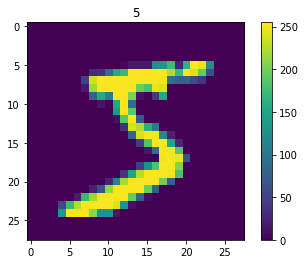

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.title(str(y_train[0])) # Since it is a list
plt.show()

# Start Building Model

In [8]:
from keras import layers
from keras import models

In this model, we are saying the model architecture is sequential, that is the output of one layer will be fed into the input layer, which indicates sequential flow of data through different layer.

In [9]:
model = models.Sequential()

Next, two Dense or fully connected layers are used. The first one has 512 units with activation function 'relu' and the input is 28 * 28 pixels corresponding to each image. The second layer has 10 units, that is it produces 10 outputs, with activation function 'softmax'. The 10 outputs would be the probability scores. (Sum of these ten probabilities = 1) The probability scores are the probaility of the image to belong to each of the ten labels.

In [10]:
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1] * X_train.shape[2], )))
model.add(layers.Dense(10, activation='softmax')) # Why softwamx -> Categorical Output

To help the model improve for every epoch, we need to tell the model to use -

* A **loss** function which a measure of performance of the model. Ususally, the loss function is minimized by the optimizer.

* An **opitmizer** which says how the model will update based on the loss function and the data

* **Metric**(s) to monitor during training and testing and judge the final performance.

**Difference between Metrics and Loss Function**- 
https://stackoverflow.com/questions/47302085/what-is-metrics-in-keras

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [12]:
def get_model():
  model = models.Sequential()
  model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1] * X_train.shape[2], )))
  model.add(layers.Dense(10, activation='softmax')) # Why softwamx -> Categorical Output
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')
  return model

Now, the training image is 3D array when we need is a 2D array.

In [13]:
X_train_images = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) # Reshaping to 60000, 28 * 28
X_test_images = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]) # Reshaping to 10000, 28 * 28

Scaling the pixels to attain a value between 0 and 1.

In [14]:
X_train_images = X_train_images.astype('float32') / 255
X_test_images = X_test_images.astype('float32') / 255

Now, before we finally fit the model, one last preprocessing step for the data would be to convert the numbers 0 to 9 to a categorically encoded labels. 

For example,

1 = [False, **True**, False, False, False, False, False, False, False, False]

=> 1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

5 = [False, False, False, False, False, **True**, False, False, False, False]

=> 5 = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [15]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Fit the model

## Simple Model Fit

In [16]:
model = get_model()

In [17]:
%%time
model.fit(X_train_images, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3343 - accuracy: 0.8995
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0894 - accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0608 - accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0490 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0402 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0293 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0255 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0203 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0151 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.013

In [18]:
pred_loss, pred_accuracy = model.evaluate(X_test_images, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1208 - accuracy: 0.9779


## Training in batches

In [19]:
%%time
model = get_model()
model.fit(X_train_images, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4302 - accuracy: 0.8774
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1138 - accuracy: 0.9673
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0684 - accuracy: 0.9797
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0493 - accuracy: 0.9861
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0365 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0257 - accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0200 - accuracy: 0.9947
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0140 - accuracy: 0.9964
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0103 - accuracy: 0.9972
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0090 - accuracy: 0.9976

In this approach, in one **epoch**, the model is being **iteratively** fitted on randomly chosen **batches** of 128 sample or images. Therefore, in one epoch, there were 5 weight updates in the model, one for each batch, based on the loss function and optimizer specified.

This process is repeated 10 times.

In [20]:
pred_loss, pred_accuracy = model.evaluate(X_test_images, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9810


## Track Model Performance per Epoch

The fit method return back the training loss and metrics, (and validation loss and metrics, where specified - like in the following fit method where we passed  the validation data) per epoch. It is useful to monitor the performance of the model.

In [21]:
%%time
model = get_model()
history = model.fit(X_train_images, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4328 - accuracy: 0.8760
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1138 - accuracy: 0.9670
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0683 - accuracy: 0.9798
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0506 - accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0362 - accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0271 - accuracy: 0.9921
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0189 - accuracy: 0.9948
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0160 - accuracy: 0.9957
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0122 - accuracy: 0.9966
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0085 - accuracy: 0.9977

Check the history.history dictionary.

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

Check the accuracy values per epoch.

In [23]:
history.history['accuracy']

[0.9254999756813049,
 0.9693999886512756,
 0.9794666767120361,
 0.9850666522979736,
 0.9886999726295471,
 0.9918000102043152,
 0.9938333630561829,
 0.995283305644989,
 0.9962999820709229,
 0.9971500039100647]

There should be 10 values for this example since we have 10 epochs.

In [24]:
len(history.history['accuracy'])

10

Generate the epochs list to plot the loss and accuracy of the model.

In [25]:
epochs = range(1, len(history.history['accuracy']) + 1)

Plot the training loss. Observe how the loss decreases over successive epochs, that is, the model's understanding as well as performance based on the training data improves.

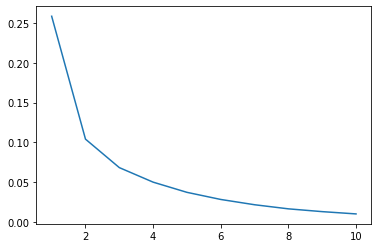

In [26]:
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.show()

Plot accuracy scores. Observe the increasing accuracy which reflects how the model's performance improves.

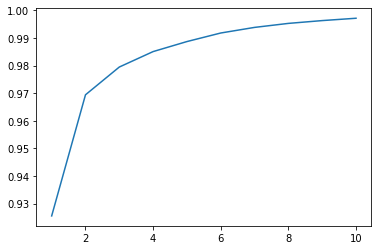

In [27]:
plt.plot(epochs, history.history['accuracy'], label='Training Loss')
plt.show()

## Use Validation Set to Fit Model

This approach for model training uses a fraction of the training data for validating the trained model per epoch. This approach is helpful to monitor if the model is overfitting to the training data and at which epoch has the optimum model's performance.

In [28]:
model = get_model()
history = model.fit(X_train_images, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4990 - accuracy: 0.8533 - val_loss: 0.2166 - val_accuracy: 0.9364
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.1345 - accuracy: 0.9605 - val_loss: 0.1288 - val_accuracy: 0.9602
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0813 - accuracy: 0.9761 - val_loss: 0.1134 - val_accuracy: 0.9664
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0579 - accuracy: 0.9831 - val_loss: 0.1082 - val_accuracy: 0.9667
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0412 - accuracy: 0.9885 - val_loss: 0.0968 - val_accuracy: 0.9720
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0289 - accuracy: 0.9918 - val_loss: 0.0927 - val_accuracy: 0.9734
Epoch 7/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0223 - accuracy: 0.9937 - val_loss: 0.0869 - val_accuracy: 0.9759
Epoch 

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
epochs = range(1, len(history.history['accuracy']) + 1)

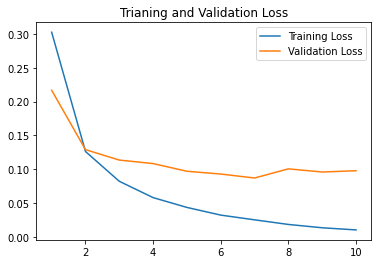

In [31]:
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Trianing and Validation Loss')
plt.legend()
plt.show()  

In this plot, observe that at the second epoch, the training and validation loss are same. The validation loss increases after sixth epoch but the training loss decreases. This is happening because the model is getting overfitted to the training data and therefore it is performing poorly on the validation data.